In [2]:
%run setup.py
%config IPython.matplotlib.backend = "retina"

# A first look at the diagram, stripped out from the paper, but might be useful for talks etc

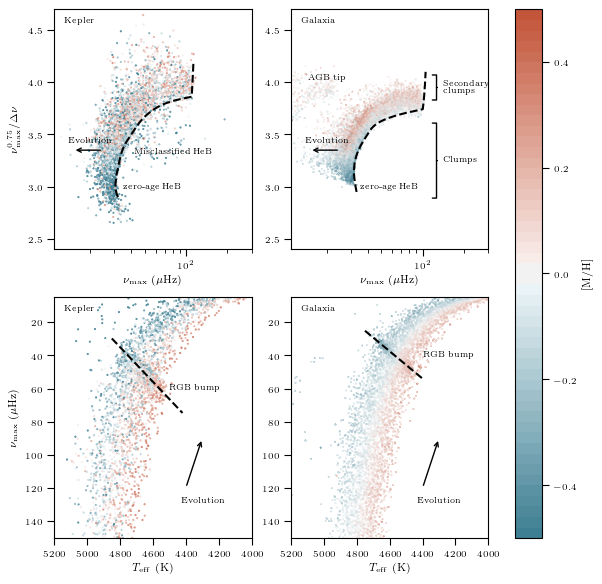

In [5]:
def points_to_line(p1, p2, x):
    k = (p1[1]-p2[1])/(p1[0]-p2[0])
    b = p2[1] - k*p2[0]
    y = k*x + b
    return y

fig, axes = plt.subplots(figsize=mnras_size(column='double', square=True), nrows=2, ncols=2, squeeze=False)

ax1, ax2, ax3, ax4 = axes.reshape(-1)

# HeB stars

yu = np.load(work_path+'sample/heb/yu/yu18.npy',allow_pickle=True).tolist()
edge = np.load(work_path+'sample/heb/yu/nike_edge_samples.npy')

pdv = np.load(work_path+'sample/heb/padova/padova.npy',allow_pickle=True).tolist()
edge_pdv = np.load(work_path+'sample/heb/padova/nike_edge_samples.npy')



# Kepler stars
c = ax1.scatter(yu['numax'], yu['nike'], c=yu['feh'], label="Kepler",
                cmap=cmap_diverging(50), vmin=-0.5, vmax=0.5, marker='.', s=1, rasterized=True)
# Galaxia stars
c = ax2.scatter(pdv['numax'], pdv['nike'], c=pdv['feh'], label="Galaxia",
                cmap=cmap_diverging(50), vmin=-0.5, vmax=0.5, marker='.', s=0.01, rasterized=True)

# edge
ax1.plot(edge[:-3000,0], edge[:-3000,1], color=black, linestyle='--',ms=1, rasterized=True)
ax2.plot(edge_pdv[:-1000,0], edge_pdv[:-1000,1], color=black, linestyle='--',ms=1, rasterized=True)


# annotations
# ax1.annotate('Secondary clumps', xy=(130, 4.05), xytext=(145, 4.05), ha='left', va='center',
# #             bbox=dict(boxstyle='square', fc='white'),
#             arrowprops=dict(arrowstyle='-[, widthB=1.5, lengthB=0.5', lw=1.0))
# ax1.annotate('Clumps', xy=(130, 3.35), xytext=(145, 3.35), ha='left', va='center',
# #             bbox=dict(boxstyle='square', fc='white'),
#             arrowprops=dict(arrowstyle='-[, widthB=5.0, lengthB=0.5', lw=1.0))
ax2.annotate('Secondary\n clumps', xy=(126, 3.95), xytext=(140, 3.95), ha='left', va='center',
#             bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=1.5, lengthB=0.5', lw=1.0), fontsize=6)
ax2.annotate('Clumps', xy=(126, 3.25), xytext=(140, 3.25), ha='left', va='center',
#             bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=4.5, lengthB=0.5', lw=1.0), fontsize=6)
# # annotations
ax1.text(35, 3.0, "zero-age HeB", va="center", ha="left", fontsize=6)
ax2.text(35, 3.0, "zero-age HeB", va="center", ha="left", fontsize=6)


# AGB stars
ax1.text(80, 3.3, 'Misclassified HeB', ha='center', va='bottom', fontsize=6)
ax2.text(20, 4.0, 'AGB tip', ha='center', va='bottom', fontsize=6)


# colorbar
# cax = fig.add_axes([0.15, .87, 0.35, 0.03]) # left, bottom, width, height
# cax = fig.add_axes([0.8, 0.1, 0.03, 0.8]) 
plt.colorbar(c, ax=axes, orientation="vertical").set_label("[M/H]")

for iax, ax in enumerate([ax1, ax2]):
    ax.axis([11, 300, 2.4, 4.7])
    ax.set_xscale("log")
    ax.set_xlabel("$\\nu_{\\rm max}$ ($\\mu$Hz)")
    if iax == 0:
        ax.set_ylabel("$\\nu_{\\rm max}^{0.75}/\\Delta\\nu$")
    # evolution arrow
    ax.annotate('', xy=(15, 3.35), xytext=(25, 3.35),
                arrowprops=dict(arrowstyle='->', lw=1.0))
    ax.text(20, 3.4, 'Evolution', ha='center', va='bottom', fontsize=6)

ax1.text(0.05, 0.95, "Kepler", transform=ax1.transAxes, va="center", ha="left", fontsize=6)
ax2.text(0.05, 0.95, "Galaxia", transform=ax2.transAxes, va="center", ha="left", fontsize=6)




# RGB stars

yu = np.load(work_path+'sample/rgb/yu/apk18.npy',allow_pickle=True).tolist()
yu_bump = np.load(work_path+'sample/rgb/yu/numax_bump.npy')

pdv = np.load(work_path+'sample/rgb/mist/mist.npy',allow_pickle=True).tolist()
pdv_bump = np.load(work_path+'sample/rgb/mist/numax_bump.npy')



# Kepler stars
c = ax3.scatter(yu['teff'], yu['numax'], c=yu['feh'], label="Kepler",
                cmap=cmap_diverging(50), vmin=-0.5, vmax=0.5, marker='.', s=1, rasterized=True)
# Galaxia stars
c = ax4.scatter(pdv['teff'], pdv['numax'], c=pdv['feh'], label="Galaxia",
                cmap=cmap_diverging(50), vmin=-0.5, vmax=0.5, marker='.', s=0.01, rasterized=True)

# bump

xbump = np.linspace(4850, 4420, 100)
ybump = yu_bump[0]*xbump+yu_bump[1]
ax3.plot(xbump, ybump, color=black, linestyle='--',ms=1, rasterized=True)
xbump = np.linspace(4750, 4400, 100)
ybump = pdv_bump[0]*xbump+pdv_bump[1]
ax4.plot(xbump, ybump, color=black, linestyle='--',ms=1, rasterized=True)


# # annotations
ax3.text(4500, 60.0, "RGB bump", va="center", ha="left", fontsize=6)
ax4.text(4400, 40.0, "RGB bump", va="center", ha="left", fontsize=6)


for iax, ax in enumerate([ax3, ax4]):
    ax.axis([5200, 4000, 150, 5])
    # ax.set_yscale("log")
    ax.set_xlabel("$T_{\\rm eff}$ (K)")
    if iax == 0:
        ax.set_ylabel("$\\nu_{\\rm max}$ ($\\mu$Hz)")
    # evolution arrow
    ax.annotate('', xy=(4300, 90), xytext=(4400, 120),
               arrowprops=dict(arrowstyle='->', lw=1.0))
    ax.text(4300, 130, 'Evolution', ha='center', va='bottom', fontsize=6)

ax3.text(0.05, 0.95, "Kepler", transform=ax3.transAxes, va="center", ha="left", fontsize=6)
ax4.text(0.05, 0.95, "Galaxia", transform=ax4.transAxes, va="center", ha="left", fontsize=6)


# plt.subplots_adjust(hspace=0)
# plt.tight_layout()


# plt.show()
plt.savefig(overleaf_path+'nike.pdf')


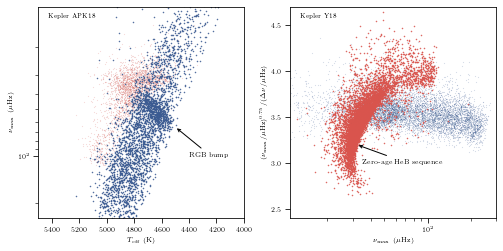

In [12]:
from astropy.io import ascii


def points_to_line(p1, p2, x):
    k = (p1[1]-p2[1])/(p1[0]-p2[0])
    b = p2[1] - k*p2[0]
    y = k*x + b
    return y

fig, axes = plt.subplots(figsize=mnras_size(column='double', ratio=0.5), nrows=1, ncols=2, squeeze=False)

ax1, ax2 = axes.reshape(-1)

hyu = np.load(work_path+'sample/heb/yu/yu18.npy',allow_pickle=True).tolist()
hapk = np.load(work_path+'sample/heb/yu/apk18.npy',allow_pickle=True).tolist()

ryu = np.load(work_path+'sample/rgb/yu/yu18.npy',allow_pickle=True).tolist()
rapk = np.load(work_path+'sample/rgb/yu/apk18.npy',allow_pickle=True).tolist()


# RGB stars
ax1.scatter(rapk['teff'], rapk['numax'],  c=blue, label="RGB", zorder=1,
                cmap=cmap_diverging(50), vmin=-0.5, vmax=0.5, marker='.', s=1.0, rasterized=True)
ax1.scatter(hapk['teff'], hapk['numax'],  c=red, label="HeB", zorder=-1,
                cmap=cmap_diverging(50), vmin=-0.5, vmax=0.5, marker='.', s=0.02, rasterized=True)

# HeB stars
ax2.scatter(hyu['numax'], hyu['nike'], c=red, label="HeB", zorder=1,
                cmap=cmap_diverging(50), vmin=-0.5, vmax=0.5, marker='.', s=1, rasterized=True)
ax2.scatter(ryu['numax'], ryu['nike'], c=blue, label="RGB", zorder=-1,
                cmap=cmap_diverging(50), vmin=-0.5, vmax=0.5, marker='.', s=0.02, rasterized=True)




for iax, ax in enumerate([ax1, ax2]):
    if iax==0:
        ax.axis([5500, 4000, 250, 11])
        ax.set_yscale("log")
        ax.set_xlabel("$T_{\\rm eff}$ (K)")
        ax.set_ylabel("$\\nu_{\\rm max}$ ($\\mu$Hz)")
        ax.annotate('RGB bump', xy=(4500, 65), xytext=(4400, 100),
                    arrowprops=dict(arrowstyle='->', lw=1.0))
    else:
        ax.axis([11, 300, 2.4, 4.7])
        ax.set_xscale("log")
        ax.set_xlabel("$\\nu_{\\rm max}$ ($\\mu$Hz)")
        ax.set_ylabel("$(\\nu_{\\rm max}/\\mu{\\rm Hz})^{0.75}/(\\Delta\\nu/\\mu{\\rm Hz})$")
        ax.annotate('Zero-age HeB sequence', xy=(32, 3.2), xytext=(35, 3.0),
                    arrowprops=dict(arrowstyle='->', lw=1.0))

#     ax.text(20, 3.4, 'Evolution', ha='center', va='bottom', fontsize=6)


ax1.text(0.05, 0.95, "Kepler APK18", transform=ax1.transAxes, va="center", ha="left", fontsize=6)
ax2.text(0.05, 0.95, "Kepler Y18", transform=ax2.transAxes, va="center", ha="left", fontsize=6)

plt.tight_layout()
plt.savefig(overleaf_path+'nike.pdf')


# Count the number of stars

In [3]:
yu = np.load(work_path+'sample/heb/yu/yu18.npy',allow_pickle=True).tolist()
print('yu18, HeB, ', len(yu['mass']))
print('yu18 HeB uncertainty on numax', np.median(yu['e_numax']/yu['numax'])*100, '%' )
print('yu18 HeB uncertainty on Dnu', np.median(yu['e_dnu']/yu['dnu'])*100, '%' )
apk = np.load(work_path+'sample/heb/yu/apk18.npy',allow_pickle=True).tolist()
print('apk18, HeB, ', len(apk['mass']))

yu = np.load(work_path+'sample/rgb/yu/yu18.npy',allow_pickle=True).tolist()
print('yu18, RGB, ', len(yu['mass']))
print('yu18 RGB uncertainty on numax', np.median(yu['e_numax']/yu['numax'])*100, '%' )
print('yu18 RGB uncertainty on Dnu', np.median(yu['e_dnu']/yu['dnu'])*100, '%' )
apk = np.load(work_path+'sample/rgb/yu/apk18.npy',allow_pickle=True).tolist()
print('apk18, RGB, ', len(apk['mass']))


yu18, HeB,  7547
yu18 HeB uncertainty on numax 2.1375098502758076 %
yu18 HeB uncertainty on Dnu 1.0664682539682537 %
apk18, HeB,  2531
yu18, RGB,  7534
yu18 RGB uncertainty on numax 0.9532955862072343 %
yu18 RGB uncertainty on Dnu 0.2522318699378716 %
apk18, RGB,  3308


# Plot the error distributions of the sample

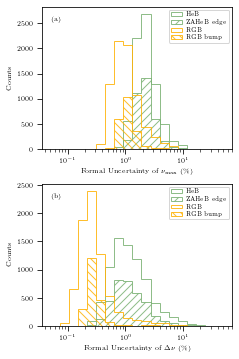

In [43]:
from lib.histdist import model_heb, model_rgb, distance_to_edge, distance_to_bump, distfit


fig, axes = plt.subplots(figsize=mnras_size(column='one', ratio=1.5), nrows=2, ncols=1, squeeze=False)

ax1, ax2 = axes.reshape(-1)

hyu = np.load(work_path+'sample/heb/yu/yu18.npy',allow_pickle=True).tolist()
hapk = np.load(work_path+'sample/heb/yu/apk18.npy',allow_pickle=True).tolist()

ryu = np.load(work_path+'sample/rgb/yu/yu18.npy',allow_pickle=True).tolist()
rapk = np.load(work_path+'sample/rgb/yu/apk18.npy',allow_pickle=True).tolist()

# plot settings
kwargs = {'bins':np.logspace(-1.3, +1.7, 20), 'histtype':'step', 'density':False, 'alpha':0.85}

# HeB
edges_obs = np.load(work_path+"sample/heb/yu_nc/mr_edge_samples.npy")
tck_obs, tp_obs = np.load(work_path+"sample/heb/yu_nc/mr_spline_tck.npy", allow_pickle=True).tolist()
hdist, xobs, yobs = distance_to_edge(hyu['numax'], hyu["dnu"], 
                                     edges_obs[:,0], edges_obs[:,1],
                                     tck_obs, tp_obs, diagram='tnu', distance='vertical')

hist_model = model_heb()
# calculate Kepler distance
hdist_obs, _, _, idx = distance_to_edge(hyu['mass'], hyu['radius'], 
                                         edges_obs[:,0], edges_obs[:,1],
                                         tck_obs, tp_obs, diagram='mr', 
                                         distance='vertical', return_idx=True)
obs = distfit(hdist_obs, hist_model)
obs = distfit(hdist_obs, hist_model, bins=obs.bins)
obs.fit(ifmcmc=False)
sigma, x0 = obs.para_fit[0], obs.para_fit[1]
hidx = (hdist_obs >= x0-1.5*sigma) & (hdist_obs <= x0+1.5*sigma)


# RGB
bump_obs = np.load(work_path+"sample/rgb/yu_nc/mr_bump.npy")
bins = np.arange(-2, 2, 0.2) # radius

hist_model = model_rgb()
# calculate Kepler distance
hdist_obs, _, _ = distance_to_bump(ryu['mass'], ryu['radius'], bump_obs, distance='vertical')
obs = distfit(hdist_obs, hist_model, bins=bins)
obs.fit(ifmcmc=False)
sigma, x0 = obs.para_fit[0], obs.para_fit[1]
ridx = (hdist_obs >= x0-1.5*sigma) & (hdist_obs <= x0+1.5*sigma)



# numax
ax1.hist(hyu['e_numax']/hyu['numax']*100, label='HeB', color=green, **kwargs)
ax1.hist(hyu['e_numax'][idx][hidx]/hyu['numax'][idx][hidx]*100, label='ZAHeB edge', color=green, hatch='///', **kwargs)
ax1.hist(ryu['e_numax']/ryu['numax']*100, label='RGB', color=orange, **kwargs)
ax1.hist(ryu['e_numax'][ridx]/ryu['numax'][ridx]*100, label='RGB bump', color=orange, hatch='\\\\\\', **kwargs)

# Dnu
ax2.hist(hyu['e_dnu']/hyu['dnu']*100, label='HeB', color=green, **kwargs)
ax2.hist(hyu['e_dnu'][idx][hidx]/hyu['dnu'][idx][hidx]*100, label='ZAHeB edge', color=green, hatch='///', **kwargs)
ax2.hist(ryu['e_dnu']/ryu['dnu']*100, label='RGB', color=orange, **kwargs)
ax2.hist(ryu['e_dnu'][ridx]/ryu['dnu'][ridx]*100, label='RGB bump', color=orange, hatch='\\\\\\', **kwargs)

ax1.set_xscale('log')
ax1.set_xlabel('Formal Uncertainty of $\\nu_{\\rm max}$ (\\%)')
ax1.set_ylabel('Counts')
ax1.legend()
ax1.text(0.05, 0.9, '(a)', transform=ax1.transAxes)

ax2.set_xscale('log')
ax2.set_xlabel('Formal Uncertainty of $\\Delta\\nu$ (\\%)')
ax2.set_ylabel('Counts')
ax2.legend()
ax2.text(0.05, 0.9, '(b)', transform=ax2.transAxes)

plt.tight_layout()
plt.savefig(overleaf_path+'formalerrors.pdf')



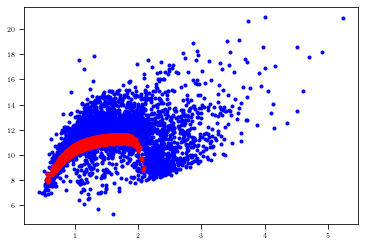

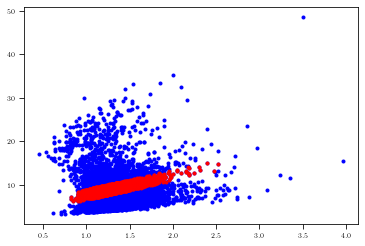

In [42]:
# verification
plt.figure()
plt.plot(hyu['mass'], hyu['radius'], 'b.')
plt.plot(hyu['mass'][idx][hidx], hyu['radius'][idx][hidx], 'r.')

plt.figure()
plt.plot(ryu['mass'], ryu['radius'], 'b.')
plt.plot(ryu['mass'][ridx], ryu['radius'][ridx], 'r.')

In [47]:
print('yu18 HeB err on numax: {:0.3f}%'.format(np.median(hyu['e_numax']/hyu['numax'])*100))
print('yu18 ZAHeB err on numax: {:0.3f}%'.format(np.median(hyu['e_numax'][idx][hidx]/hyu['numax'][idx][hidx])*100))
print('yu18 HeB err on Dnu: {:0.3f}%'.format(np.median(hyu['e_dnu']/hyu['dnu'])*100))
print('yu18 ZAHeB err on Dnu: {:0.3f}%'.format(np.median(hyu['e_dnu'][idx][hidx]/hyu['dnu'][idx][hidx])*100))

print('yu18 RGB err on numax: {:0.3f}%'.format(np.median(ryu['e_numax']/ryu['numax'])*100))
print('yu18 RGBb err on numax: {:0.3f}%'.format(np.median(ryu['e_numax'][ridx]/ryu['numax'][ridx])*100))
print('yu18 RGB err on Dnu: {:0.3f}%'.format(np.median(ryu['e_dnu']/ryu['dnu'])*100))
print('yu18 RGBb err on Dnu: {:0.3f}%'.format(np.median(ryu['e_dnu'][ridx]/ryu['dnu'][ridx])*100))

yu18 HeB err on numax: 2.138%
yu18 ZAHeB err on numax: 2.100%
yu18 HeB err on Dnu: 1.066%
yu18 ZAHeB err on numax: 1.074%
yu18 RGB err on numax: 0.953%
yu18 RGBb err on numax: 1.061%
yu18 RGB err on Dnu: 0.252%
yu18 RGBb err on Dnu: 0.268%


# Kallinger

Text(0.05, 0.9, '(b)')

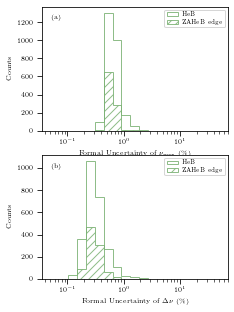

In [3]:
from lib.histdist import model_heb, model_rgb, distance_to_edge, distance_to_bump, distfit


fig, axes = plt.subplots(figsize=mnras_size(column='one', ratio=1.5), nrows=2, ncols=1, squeeze=False)

ax1, ax2 = axes.reshape(-1)

hyu = np.load(work_path+'sample/heb/ka_nc/ka18.npy',allow_pickle=True).tolist()
# hapk = np.load(work_path+'sample/heb/ka_nc/apk18.npy',allow_pickle=True).tolist()

# ryu = np.load(work_path+'sample/rgb/yu/yu18.npy',allow_pickle=True).tolist()
# rapk = np.load(work_path+'sample/rgb/yu/apk18.npy',allow_pickle=True).tolist()

# plot settings
kwargs = {'bins':np.logspace(-1.3, +1.7, 20), 'histtype':'step', 'density':False, 'alpha':0.85}

# HeB
edges_obs = np.load(work_path+"sample/heb/ka_nc/mr_edge_samples.npy")
tck_obs, tp_obs = np.load(work_path+"sample/heb/ka_nc/mr_spline_tck.npy", allow_pickle=True).tolist()
hdist, xobs, yobs = distance_to_edge(hyu['numax'], hyu["dnu"], 
                                     edges_obs[:,0], edges_obs[:,1],
                                     tck_obs, tp_obs, diagram='tnu', distance='vertical')

hist_model = model_heb()
# calculate Kepler distance
hdist_obs, _, _, idx = distance_to_edge(hyu['mass'], hyu['radius'], 
                                         edges_obs[:,0], edges_obs[:,1],
                                         tck_obs, tp_obs, diagram='mr', 
                                         distance='vertical', return_idx=True)
obs = distfit(hdist_obs, hist_model)
obs = distfit(hdist_obs, hist_model, bins=obs.bins)
obs.fit(ifmcmc=False)
sigma, x0 = obs.para_fit[0], obs.para_fit[1]
hidx = (hdist_obs >= x0-1.5*sigma) & (hdist_obs <= x0+1.5*sigma)


# # RGB
# bump_obs = np.load(work_path+"sample/rgb/yu_nc/mr_bump.npy")
# bins = np.arange(-2, 2, 0.2) # radius

# hist_model = model_rgb()
# # calculate Kepler distance
# hdist_obs, _, _ = distance_to_bump(ryu['mass'], ryu['radius'], bump_obs, distance='vertical')
# obs = distfit(hdist_obs, hist_model, bins=bins)
# obs.fit(ifmcmc=False)
# sigma, x0 = obs.para_fit[0], obs.para_fit[1]
# ridx = (hdist_obs >= x0-1.5*sigma) & (hdist_obs <= x0+1.5*sigma)



# numax
ax1.hist(hyu['e_numax']/hyu['numax']*100, label='HeB', color=green, **kwargs)
ax1.hist(hyu['e_numax'][idx][hidx]/hyu['numax'][idx][hidx]*100, label='ZAHeB edge', color=green, hatch='///', **kwargs)
# ax1.hist(ryu['e_numax']/ryu['numax']*100, label='RGB', color=orange, **kwargs)
# ax1.hist(ryu['e_numax'][ridx]/ryu['numax'][ridx]*100, label='RGB bump', color=orange, hatch='\\\\\\', **kwargs)

# Dnu
ax2.hist(hyu['e_dnu']/hyu['dnu']*100, label='HeB', color=green, **kwargs)
ax2.hist(hyu['e_dnu'][idx][hidx]/hyu['dnu'][idx][hidx]*100, label='ZAHeB edge', color=green, hatch='///', **kwargs)
# ax2.hist(ryu['e_dnu']/ryu['dnu']*100, label='RGB', color=orange, **kwargs)
# ax2.hist(ryu['e_dnu'][ridx]/ryu['dnu'][ridx]*100, label='RGB bump', color=orange, hatch='\\\\\\', **kwargs)

ax1.set_xscale('log')
ax1.set_xlabel('Formal Uncertainty of $\\nu_{\\rm max}$ (\\%)')
ax1.set_ylabel('Counts')
ax1.legend()
ax1.text(0.05, 0.9, '(a)', transform=ax1.transAxes)

ax2.set_xscale('log')
ax2.set_xlabel('Formal Uncertainty of $\\Delta\\nu$ (\\%)')
ax2.set_ylabel('Counts')
ax2.legend()
ax2.text(0.05, 0.9, '(b)', transform=ax2.transAxes)



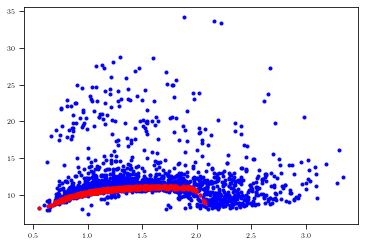

In [5]:
# verification
plt.figure()
plt.plot(hyu['mass'], hyu['radius'], 'b.')
plt.plot(hyu['mass'][idx][hidx], hyu['radius'][idx][hidx], 'r.')

# plt.figure()
# plt.plot(ryu['mass'], ryu['radius'], 'b.')
# plt.plot(ryu['mass'][ridx], ryu['radius'][ridx], 'r.')

In [7]:
print('ka18 HeB err on numax: {:0.3f}%'.format(np.median(hyu['e_numax']/hyu['numax'])*100))
print('ka18 ZAHeB err on numax: {:0.3f}%'.format(np.median(hyu['e_numax'][idx][hidx]/hyu['numax'][idx][hidx])*100))
print('ka18 HeB err on Dnu: {:0.3f}%'.format(np.median(hyu['e_dnu']/hyu['dnu'])*100))
print('ka18 ZAHeB err on Dnu: {:0.3f}%'.format(np.median(hyu['e_dnu'][idx][hidx]/hyu['dnu'][idx][hidx])*100))

# print('yu18 RGB err on numax: {:0.3f}%'.format(np.median(ryu['e_numax']/ryu['numax'])*100))
# print('yu18 RGBb err on numax: {:0.3f}%'.format(np.median(ryu['e_numax'][ridx]/ryu['numax'][ridx])*100))
# print('yu18 RGB err on Dnu: {:0.3f}%'.format(np.median(ryu['e_dnu']/ryu['dnu'])*100))
# print('yu18 RGBb err on Dnu: {:0.3f}%'.format(np.median(ryu['e_dnu'][ridx]/ryu['dnu'][ridx])*100))

ka18 HeB err on numax: 0.631%
ka18 ZAHeB err on numax: 0.608%
ka18 HeB err on Dnu: 0.294%
ka18 ZAHeB err on Dnu: 0.291%
